In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv('spam.csv')

## DATA CLEANING

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
data.isnull().sum()/data.shape[0]

v1            0.000000
v2            0.000000
Unnamed: 2    0.991027
Unnamed: 3    0.997846
Unnamed: 4    0.998923
dtype: float64

In [6]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#renaming the columns 
data.rename(columns = {'v1':'target','v2':'text'}, inplace = True)

In [9]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()

In [12]:
data['target'] = encoder.fit_transform(data['target'])

In [13]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#checking duplicate values
data.duplicated().sum()

403

In [15]:
data = data.drop_duplicates()

In [16]:
data.shape

(5169, 2)

In [17]:
data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [18]:
data = data.reset_index()

In [19]:
data.drop(columns = ['index'], inplace = True)

In [20]:
data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...
5165,0,Will �_ b going to esplanade fr home?
5166,0,"Pity, * was in mood for that. So...any other s..."
5167,0,The guy did some bitching but I acted like i'd...


## Exploratory Data Analysis

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

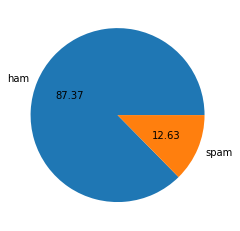

In [22]:
plt.pie(data['target'].value_counts(), labels=['ham', 'spam'], autopct = '%0.2f')
plt.show()
#Majority of the messages are ham messages 

In [23]:
import nltk


In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ujjal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [25]:
#number of characters
data['char'] = data['text'].apply(len)

In [26]:
#number of words 
data['words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [27]:
#number of sentences 
data['sentence'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
data.head()

,target,text,char,words,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
data[['char', 'words', 'sentence']].describe()

,char,words,sentence
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.454246,1.948152
std,58.174846,13.325668,1.363792
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
import seaborn as sns

<AxesSubplot:xlabel='char', ylabel='Count'>

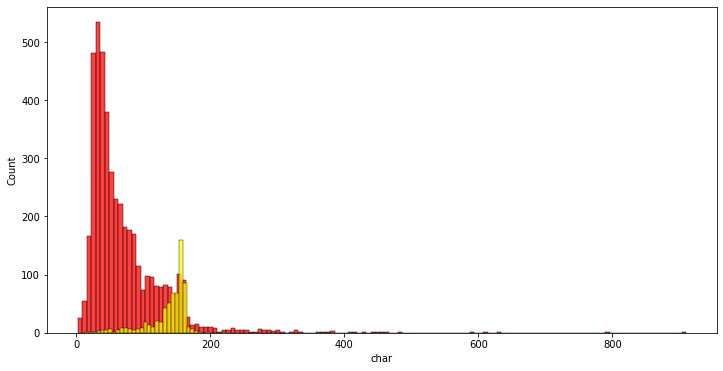

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0].char, color='red')
sns.histplot(data[data['target']==1].char, color='yellow')

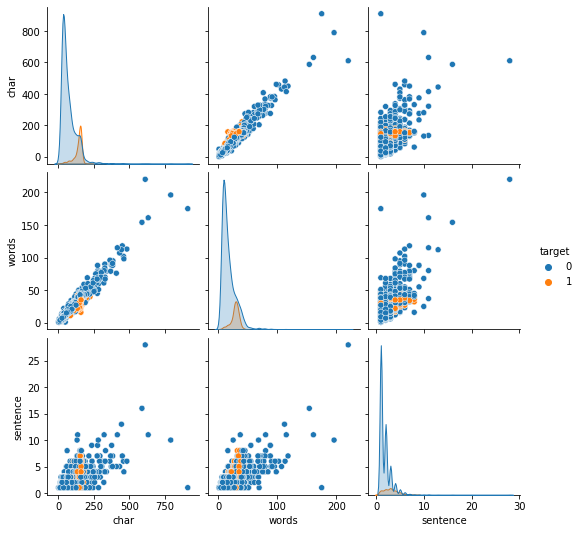

In [32]:
sns.pairplot(data, hue='target')

In [33]:
data.corr()

,target,char,words,sentence
target,1.000000,0.382785,0.263157,0.286477
char,0.382785,1.000000,0.966072,0.638150
words,0.263157,0.966072,1.000000,0.684546
sentence,0.286477,0.638150,0.684546,1.000000


<AxesSubplot:>

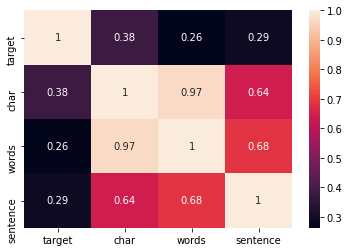

In [34]:
sns.heatmap(data.corr(), annot=True)

## Data PreProcessing

Lower case,
Tokenization
Remove special characters
Remove stop words and punctuations 
Stemming


In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ujjal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [36]:
from nltk.corpus import stopwords

In [37]:
!pip install nltk

In [38]:
import string

In [39]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
from nltk.stem.porter import PorterStemmer

In [41]:
ps = PorterStemmer()

In [42]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
    

In [43]:
transform("I am 20 % evil!")

'20 evil'

In [44]:
data['cleaned_text'] = data['text'].apply(transform)

In [45]:
data.head()

,target,text,char,words,sentence,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
spam_words=[]
for msg in data[data['target']==1]['cleaned_text'].tolist():
    for word in msg.split(" "):
        spam_words.append(word)

In [47]:
len(spam_words)

9941

In [48]:
from collections import Counter

c:\users\ujjal\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


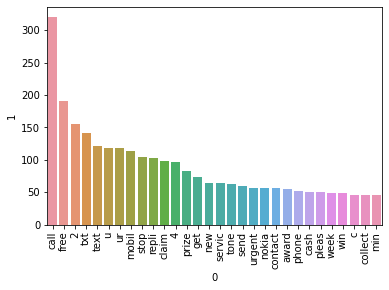

In [49]:
sns.barplot(pd.DataFrame(Counter(spam_words).most_common(30))[0], pd.DataFrame(Counter(spam_words).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [50]:
ham_words = []
for msg in data[data['target']==0]['cleaned_text'].tolist():
    for word in msg.split(" "):
        ham_words.append(word)

c:\users\ujjal\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


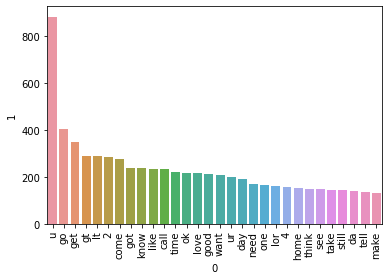

In [51]:
sns.barplot(pd.DataFrame(Counter(ham_words).most_common(30))[0], pd.DataFrame(Counter(ham_words).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

## MODEL BUILDING 

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
cv = CountVectorizer()

In [54]:
x = cv.fit_transform(data['cleaned_text']).toarray()

In [55]:
x.shape

(5169, 6677)

In [56]:
y = data['target'].values

In [57]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [60]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [61]:
gnb = GaussianNB()

In [62]:
mnb = MultinomialNB()

In [67]:
bnb = BernoulliNB()

In [68]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8626692456479691
0.4959349593495935
[[770 124]
 [ 18 122]]


In [69]:
print(accuracy_score(y_pred1, y_test))
print(precision_score(y_pred1, y_test))
print(confusion_matrix(y_pred1, y_test))

0.8626692456479691
0.8714285714285714
[[770  18]
 [124 122]]


In [70]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.971953578336557
0.8827586206896552
[[877  17]
 [ 12 128]]


In [71]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.9680851063829787
0.9734513274336283
[[891   3]
 [ 30 110]]


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
tfidf = TfidfVectorizer()

In [74]:
x1 = tfidf.fit_transform(data['cleaned_text']).toarray()

In [75]:
x1.shape

(5169, 6677)

In [76]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size = 0.2, random_state = 4)

In [77]:
gnb.fit(x1_train, y1_train)
y_pred1 = gnb.predict(x1_test)
print(accuracy_score(y1_test, y_pred1))
print(confusion_matrix(y1_test, y_pred1))
print(precision_score(y1_test, y_pred1))


0.8626692456479691
[[782 124]
 [ 18 110]]
0.4700854700854701


In [78]:
mnb.fit(x1_train, y1_train)
y_pred2 = mnb.predict(x1_test)
print(accuracy_score(y1_test, y_pred2))
print(precision_score(y1_test, y_pred2))
print(confusion_matrix(y1_test, y_pred2))

0.9574468085106383
1.0
[[906   0]
 [ 44  84]]


In [79]:
bnb.fit(x1_train, y1_train)
y_pred3 = bnb.predict(x1_test)
print(accuracy_score(y1_test, y_pred3))
print(precision_score(y1_test, y_pred3))
print(confusion_matrix(y1_test, y_pred3))

0.971953578336557
0.9459459459459459
[[900   6]
 [ 23 105]]


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [81]:
knn = KNeighborsClassifier()
lr = LogisticRegression(solver = 'liblinear', penalty = 'l1')
mnb = MultinomialNB()
dct = DecisionTreeClassifier(max_depth = 5)
rf = RandomForestClassifier(n_estimators = 50, random_state = 2)

In [82]:
clfs = {
    'knn' : knn,
    'lr' : lr,
    'mnb' : mnb,
    'dct' : dct,
    'rf' : rf
}

In [83]:
clfs

{'knn': KNeighborsClassifier(),
 'lr': LogisticRegression(penalty='l1', solver='liblinear'),
 'mnb': MultinomialNB(),
 'dct': DecisionTreeClassifier(max_depth=5),
 'rf': RandomForestClassifier(n_estimators=50, random_state=2)}

In [84]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size = 0.2, random_state = 4)

In [85]:
def train_classifier(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    
    return acc, prec


In [86]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_acc, current_pres = train_classifier(clf, x1_train, x1_test, y1_train, y1_test)
    print('For ', name)
    print('Accuracy: ',current_acc)
    print('Precision: ',current_pres)
    
    accuracy_scores.append(current_acc)
    precision_scores.append(current_pres)
    

For  knn
Accuracy:  0.90715667311412
Precision:  1.0
For  lr
Accuracy:  0.9506769825918762
Precision:  0.9425287356321839
For  mnb
Accuracy:  0.9574468085106383
Precision:  1.0
For  dct
Accuracy:  0.941972920696325
Precision:  0.7982456140350878
For  rf
Accuracy:  0.9709864603481625
Precision:  0.99


In [87]:
accuracy_scores

[0.90715667311412,
 0.9506769825918762,
 0.9574468085106383,
 0.941972920696325,
 0.9709864603481625]

In [88]:
Scores = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy': accuracy_scores, 'Precision' : precision_scores})

In [89]:
Scores.sort_values(by ='Precision', ascending  = False)

,Algorithm,Accuracy,Precision
0,knn,0.907157,1.000000
2,mnb,0.957447,1.000000
4,rf,0.970986,0.990000
1,lr,0.950677,0.942529
3,dct,0.941973,0.798246


c:\users\ujjal\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


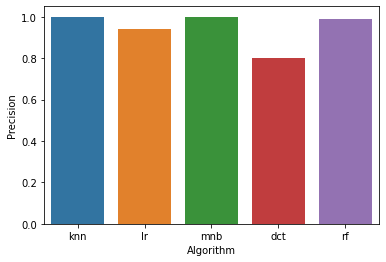

In [90]:
sns.barplot(Scores['Algorithm'], Scores['Precision'])
plt.show()

In [91]:
tfidf = TfidfVectorizer(max_features = 3000)
x1 = tfidf.fit_transform(data['cleaned_text']).toarray()
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size = 0.2, random_state = 2)
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_acc, current_pres = train_classifier(clf, x1_train, x1_test, y1_train, y1_test)
    print('For ', name)
    print('Accuracy: ',current_acc)
    print('Precision: ',current_pres)
    
    accuracy_scores.append(current_acc)
    precision_scores.append(current_pres)


For  knn
Accuracy:  0.9052224371373307
Precision:  1.0
For  lr
Accuracy:  0.9564796905222437
Precision:  0.9696969696969697
For  mnb
Accuracy:  0.971953578336557
Precision:  1.0
For  dct
Accuracy:  0.9323017408123792
Precision:  0.8469387755102041
For  rf
Accuracy:  0.9758220502901354
Precision:  0.9829059829059829


In [92]:
Scores['acc_max_ft_3000']=pd.DataFrame(accuracy_scores)

In [93]:
Scores.head()

,Algorithm,Accuracy,Precision,acc_max_ft_3000
0,knn,0.907157,1.000000,0.905222
1,lr,0.950677,0.942529,0.956480
2,mnb,0.957447,1.000000,0.971954
3,dct,0.941973,0.798246,0.932302
4,rf,0.970986,0.990000,0.975822


In [94]:
Scores['prec_max_ft_3000']=pd.DataFrame(precision_scores)

In [95]:
Scores.head()

,Algorithm,Accuracy,Precision,acc_max_ft_3000,prec_max_ft_3000
0,knn,0.907157,1.000000,0.905222,1.000000
1,lr,0.950677,0.942529,0.956480,0.969697
2,mnb,0.957447,1.000000,0.971954,1.000000
3,dct,0.941973,0.798246,0.932302,0.846939
4,rf,0.970986,0.990000,0.975822,0.982906


In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [98]:
scaler = MinMaxScaler()

In [99]:
x1 = scaler.fit_transform(x1)

In [100]:
x1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size = 0.2, random_state = 2)
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_acc, current_pres = train_classifier(clf, x1_train, x1_test, y1_train, y1_test)
    print('For ', name)
    print('Accuracy: ',current_acc)
    print('Precision: ',current_pres)
    
    accuracy_scores.append(current_acc)
    precision_scores.append(current_pres)

For  knn
Accuracy:  0.9052224371373307
Precision:  0.9761904761904762
For  lr
Accuracy:  0.9671179883945842
Precision:  0.9642857142857143
For  mnb
Accuracy:  0.9787234042553191
Precision:  0.9461538461538461
For  dct
Accuracy:  0.9323017408123792
Precision:  0.84
For  rf
Accuracy:  0.9758220502901354
Precision:  0.9829059829059829


In [102]:
Scores['acc_min_max_scaler']=pd.DataFrame(accuracy_scores)
Scores['prec_min_max_scaler']=pd.DataFrame(precision_scores)

In [103]:
Scores.head()

,Algorithm,Accuracy,Precision,acc_max_ft_3000,prec_max_ft_3000,acc_min_max_scaler,prec_min_max_scaler
0,knn,0.907157,1.000000,0.905222,1.000000,0.905222,0.976190
1,lr,0.950677,0.942529,0.956480,0.969697,0.967118,0.964286
2,mnb,0.957447,1.000000,0.971954,1.000000,0.978723,0.946154
3,dct,0.941973,0.798246,0.932302,0.846939,0.932302,0.840000
4,rf,0.970986,0.990000,0.975822,0.982906,0.975822,0.982906


In [104]:
#Voting Classifier
knn = KNeighborsClassifier()
mnb = MultinomialNB()

from sklearn.ensemble import VotingClassifier

In [105]:
voting = VotingClassifier(estimators=[('knn',knn), ('mnb',mnb)], voting = 'soft')
voting.fit(x1_train, y1_train)
y_pred = voting.predict(x1_test)
print("Accuracy score: ", accuracy_score(y1_test, y_pred))
print("Precision score: ", precision_score(y1_test, y_pred))

Accuracy score:  0.9361702127659575
Precision score:  0.9864864864864865


##### We have tried applying several improvements to our model, however the best score was achieved by using Tfidf for vectorizing the words and Multinomial Naive Bayes algorithm

In [106]:
tfidf = TfidfVectorizer(max_features = 3000)
x1 = tfidf.fit_transform(data['cleaned_text']).toarray()
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size = 0.2, random_state = 2)
mnb.fit(x1_train, y1_train)
y_pred = mnb.predict(x1_test)
print(accuracy_score(y1_test, y_pred))
print(precision_score(y1_test, y_pred))
print(confusion_matrix(y1_test, y_pred))

0.971953578336557
1.0
[[896   0]
 [ 29 109]]


In [107]:
type(data['cleaned_text'])

pandas.core.series.Series

In [108]:
def spam_pred(text):
    text = tfidf.transform([text])
    y_pred = mnb.predict(text)
    if(y_pred==0):
        print('That is not a spam message')
    else:
        print('That is a spam message')
    return

In [109]:
spam_pred("WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.")

That is a spam message
